In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#These are 2 types of supervised learning 

In [69]:
df = pd.read_csv('single_family_home_values.csv')
X = df[['bedrooms','bathrooms','rooms','squareFootage','lotSize','yearBuilt','priorSaleAmount']]
X.fillna(0, inplace=True)

c:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [70]:
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0


In [71]:
#using categories in X dataframe we want to predict estimated value
y = df.estimated_value
y.head(2)#naming convention if variable uppercase then its matrix and if it is lower case then it is a vector / single column

0    239753
1    343963
Name: estimated_value, dtype: int64

In [72]:
#X has features and y is known outcome, in supervised learning we have the known outcome
lg = LinearRegression()
lg.fit(X,y)  # training
lg.score(X,y)# testing


0.7648477834199695

In [73]:
#so inorder to clear noise from dataset
X_train, X_test, y_train, y_test = train_test_split(X,y) # this remove 25% of dataset points
print(X_train.shape ,y_train.shape) #is X dataframe and y vector after training
print(X_test.shape ,y_test.shape) #is X dataframe and y vector removed values
 

(11250, 7) (11250,)
(3750, 7) (3750,)


In [74]:
lg.fit(X_train, y_train)
lg.score(X_test, y_test)#gives r squared value i.e how well does the your model can predict the data

0.7840424313001083

In [75]:
#logistic regression
# first we need to make a columns having set number of values as in logistic there are classes 
df['estimated_value_bins'] = df.estimated_value.apply(lambda x: 'high' if x> 500000 else 'low')
df.head(10)
#df.estimated_value_bins.value_counts() -> to count number of high and low
z = df.estimated_value_bins


<AxesSubplot:>

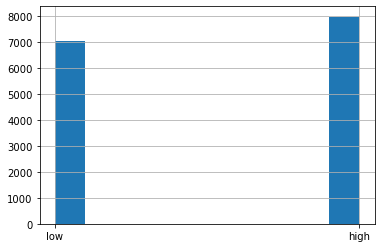

In [76]:
df.estimated_value_bins.hist()

In [77]:
lr = LogisticRegression()
X_train, X_test, z_train, z_test = train_test_split(X,z)
lr.fit(X_train, z_train)
lr.score(X_test,z_test)# 82 percent time we predict it correctly eg: if there is a row in X for which estimated value is not known then we can predict the estimated value is high or low with 82% accuracy 

0.8232

In [78]:
z_predict = lr.predict(X_test)# contains predicted values
z_predict

array(['low', 'high', 'high', ..., 'low', 'low', 'high'], dtype=object)

In [79]:
z_true = np.array(z_test)# contains real values
z_true

array(['low', 'high', 'high', ..., 'high', 'high', 'high'], dtype=object)

In [81]:
# 1675-> when predicted high and actually high
# 360-> when predicted high but not high
# 269-> when predicted low but not low
# 1446-> when predicted low and actually low
'''
                Real high    Real low
predicted high  value        value
predicted low   value        value
'''
confusion_matrix(z_true, z_predict)

array([[1655,  367],
       [ 296, 1432]], dtype=int64)

In [82]:
#SVM support vector machine it tries to maximise margin between classifiers
svr = SVR()# for regression
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
#not so great score

-0.057502303502656726

In [83]:
svc = SVC()# for regression
svc.fit(X_train, z_train)
svc.score(X_test, z_test)
# not a very good score

0.6925333333333333

In [84]:
z_pred = svc.predict(X_test)
confusion_matrix(z_test, z_pred)

array([[1020, 1002],
       [ 151, 1577]], dtype=int64)

In [85]:
##KNN : looks at closet neighbours for classification
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

-0.210163676534052

In [86]:
knc = KNeighborsClassifier()
knc.fit(X_train, z_train)
knc.score(X_test, z_test)

0.824

In [87]:
z_pred = knc.predict(X_test)
confusion_matrix(z_test, z_pred)

array([[1656,  366],
       [ 294, 1434]], dtype=int64)